In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [6]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\hpcod\AppData\Local\Temp\ipykernel_6140\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

C:\Users\hpcod\AppData\Local\Temp\ipykernel_6140\2141506449.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], kde=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


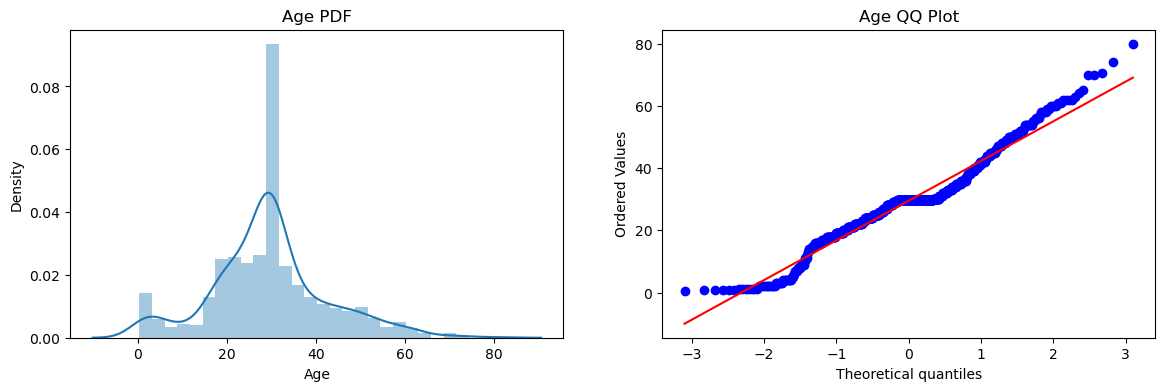

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Adjust the figure size
plt.figure(figsize=(14, 4))

# First subplot: Distribution plot (PDF) of 'Age'
plt.subplot(121)
sns.distplot(X_train['Age'], kde=True)
plt.title('Age PDF')

# Second subplot: Q-Q plot of 'Age'
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

# Show the plots
plt.show()


C:\Users\hpcod\AppData\Local\Temp\ipykernel_6140\111354510.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'], kde=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


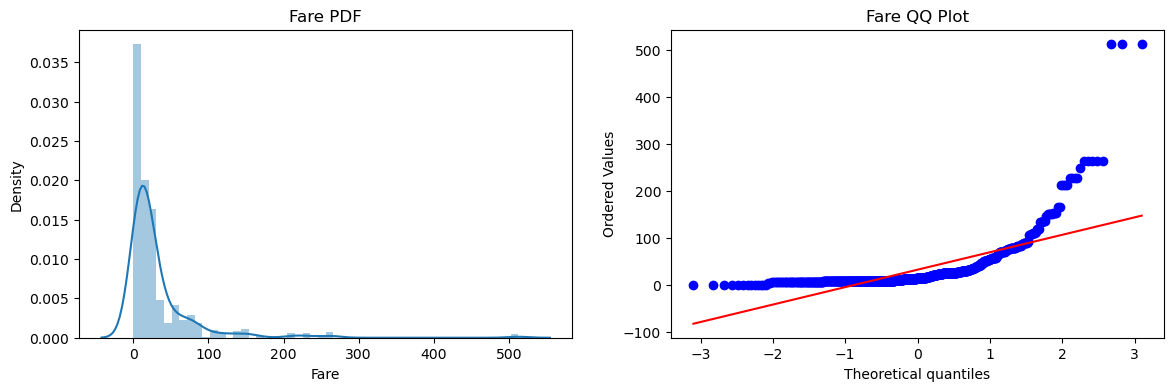

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Adjust the figure size
plt.figure(figsize=(14, 4))

# First subplot: Distribution plot (PDF) of 'Fare'
plt.subplot(121)
sns.distplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

# Second subplot: Q-Q plot of 'Fare'
plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

# Show the plots
plt.show()


In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [32]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [33]:
trf = FunctionTransformer(func=np.log1p)

In [34]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [37]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf,X_transformed, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2,X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.655505617977528


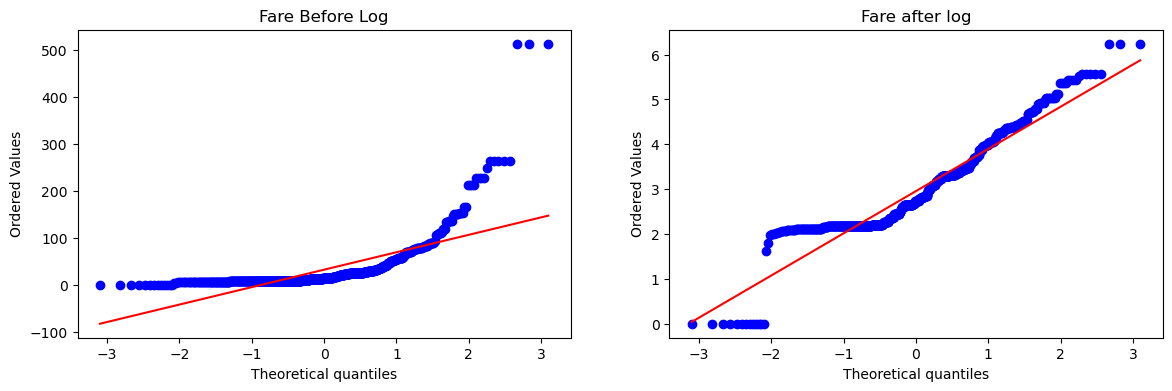

In [43]:
plt.figure(figsize=(14,4))


# Second subplot: Q-Q plot of 'Fare
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after log')

# Show the plots
plt.show()


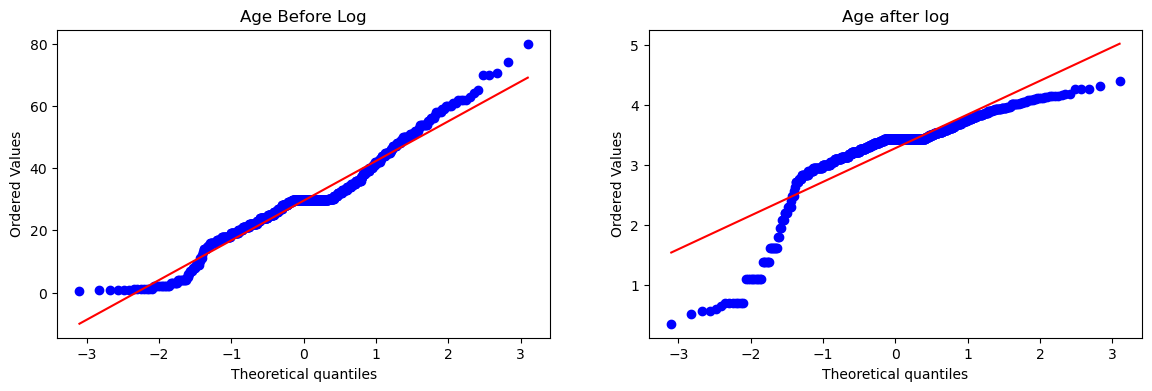

In [44]:
plt.figure(figsize=(14,4))


# Second subplot: Q-Q plot of 'Age'
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after log')

# Show the plots
plt.show()


In [46]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [50]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)


print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [51]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf,X_transformed2, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2,X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6610861423220974


NameError: name 'X_trans' is not defined

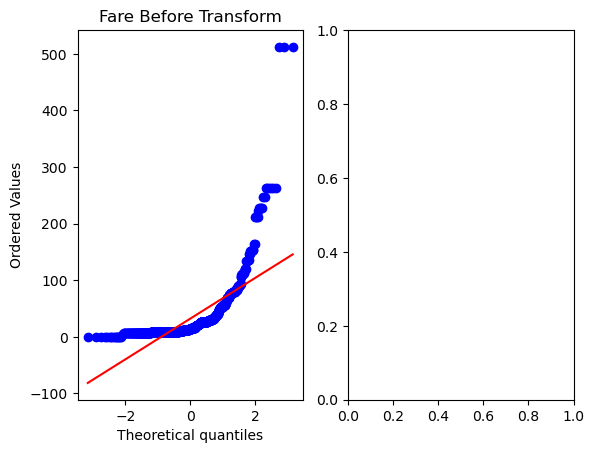

In [66]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print('Accuaracy', np.mean(cross_val_score(clf,X_trans, y, scoring='accuracy', cv=10)))
    
    plt.figure(figsize=(14,4))
        
        
        
        
         
    # Second subplot: Q-Q plot of 'Fare
plt.subplot(121)
stats.probplot(X['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Transform')

plt.subplot(122)
stats.probplot(X_trans[:,0], dist='norm', plot=plt)
plt.title('Fare after Transform')

# Show the plots
plt.show()




Accuracy: 0.48


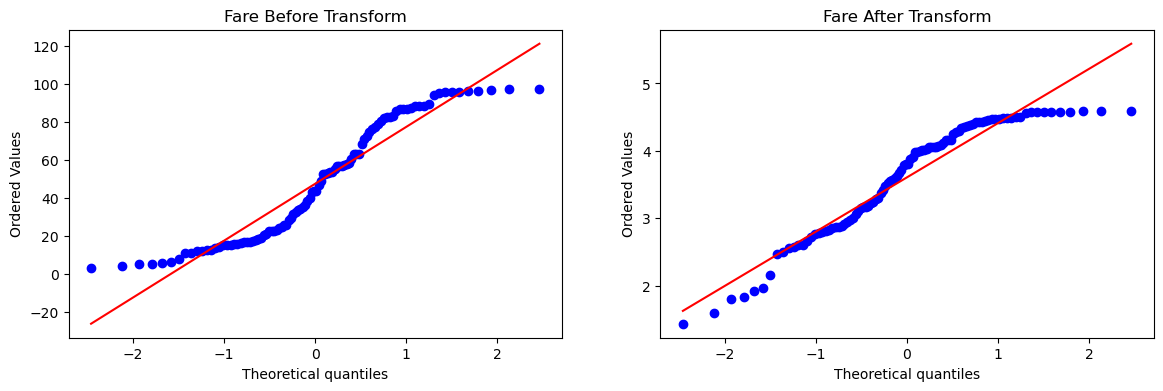

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming df is your dataframe
# Sample data, replace this with your actual dataframe
df = pd.DataFrame({
    'Target': np.random.randint(0, 2, size=100),
    'Fare': np.random.rand(100) * 100,
    'OtherFeature': np.random.rand(100)
})

def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    accuracy = np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10))
    print('Accuracy:', accuracy)
    
    plt.figure(figsize=(14, 4))

    # First subplot: Q-Q plot of 'Fare' before transform
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    # Second subplot: Q-Q plot of 'Fare' after transform
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

    # Show the plots
    plt.show()

# Define a transformation function, e.g., np.log1p to apply log transformation
apply_transform(np.log1p)


Accuracy: 0.59


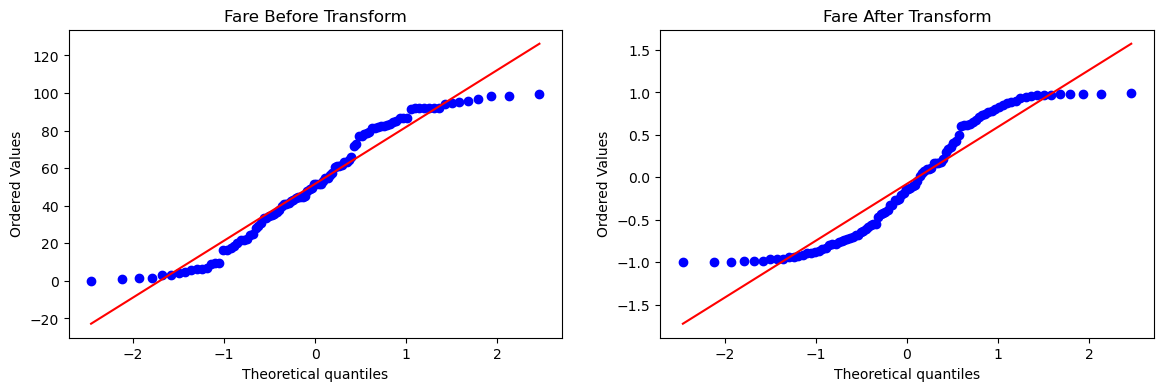

In [80]:
apply_transform(np.sin)

Accuracy: 0.51


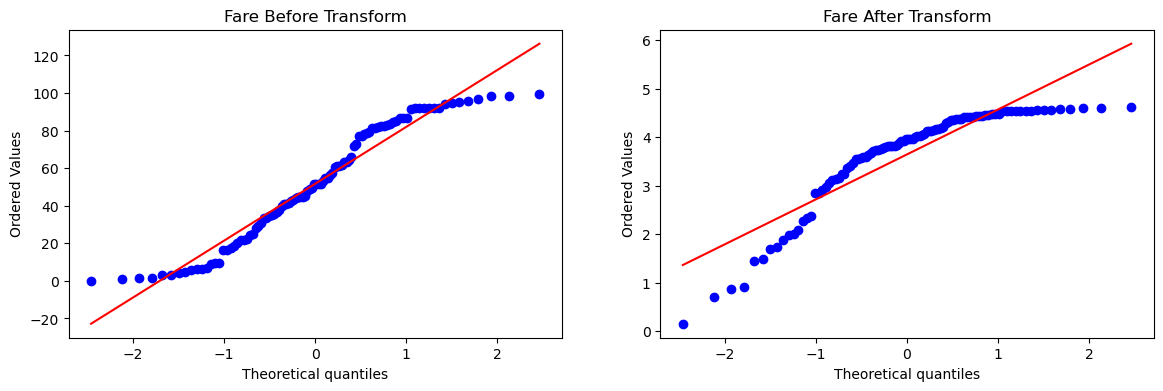

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming df is your dataframe
# Sample data, replace this with your actual dataframe
df = pd.DataFrame({
    'Target': np.random.randint(0, 2, size=100),
    'Fare': np.random.rand(100) * 100,
    'OtherFeature': np.random.rand(100)
})

def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print('Accuracy:', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))
    
    plt.figure(figsize=(14, 4))
    
    # First subplot: Q-Q plot of 'Fare' before transform
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    # Second subplot: Q-Q plot of 'Fare' after transform
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

    # Show the plots
    plt.show()

# Define a transformation function, e.g., np.log1p to apply log transformation
apply_transform(np.log1p)
